# Main Code: scENCORE
This is the main code for normalisation, correlation, graph construction, graph embedding, clustering and graph alignment.

This notebook contains data analysis using scENCORE methods and modified and optimised the scENCORE code. https://github.com/aicb-ZhangLabs/scENCORE

## Normalization and correlation

In [2]:
import os
import scanpy as sc
import pyranges as pr
import warnings

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import argparse
import networkx as nx
import numpy as np

from typing import Dict

In [3]:
# Check the software quality of metacell data which is aggregated matrix of cell x bin matrix
# Read the Metacell x Bin matrix CSV file into a DataFrame for Cell Type C3
df_C3 = pd.read_csv('./metacell_output/seacell_data_C3.csv')

# Display Metacell x Bin matrix
df_C3

,0,1,2,3,4,5,6,7,8,9,...,6196,6197,6198,6199,6200,6201,6202,6203,6204,6205
0,0.0,0.0,100.0,100.0,0.0,0.0,62.0,100.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,77.0,78.0,0.0,0.0,46.0,78.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,102.0,102.0,0.0,0.0,68.0,102.0,0.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,202.0,202.0,0.0,0.0,131.0,197.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,76.0,76.0,0.0,0.0,57.0,76.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,46.0,46.0,0.0,0.0,31.0,46.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,51.0,51.0,0.0,0.0,38.0,51.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,90.0,90.0,0.0,0.0,43.0,90.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,39.0,39.0,0.0,0.0,29.0,39.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,67.0,67.0,0.0,0.0,36.0,67.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Check the software quality of metacell data which is aggregated matrix of cell x bin matrix
# Read the Metacell x Bin matrix CSV file into a DataFrame for Cell Type C4
df_C4 = pd.read_csv('./metacell_output/seacell_data_C4.csv')

# Display Metacell x Bin matrix
df_C4

,0,1,2,3,4,5,6,7,8,9,...,6196,6197,6198,6199,6200,6201,6202,6203,6204,6205
0,0.0,0.0,254.0,254.0,0.0,0.0,111.0,248.0,0.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,99.0,99.0,0.0,0.0,46.0,99.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,100.0,100.0,0.0,0.0,54.0,96.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,59.0,59.0,0.0,0.0,32.0,59.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,74.0,74.0,0.0,0.0,26.0,74.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,115.0,115.0,0.0,0.0,60.0,114.0,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,50.0,50.0,0.0,0.0,21.0,48.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,37.0,37.0,0.0,0.0,20.0,36.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,22.0,21.0,0.0,0.0,6.0,21.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,51.0,51.0,0.0,0.0,27.0,50.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Normalization
row_sum_C3 = df_C3.sum(axis=1)
normalized_df_C3 = df_C3.div(row_sum_C3, axis=0)

# Compute the correlation matrix
corr_matrix_C3 = normalized_df_C3.corr()

# Set negative correlations to zero (if required)
corr_matrix_C3[corr_matrix_C3 < 0] = 0


# Normalization
row_sum_C4 = df_C4.sum(axis=1)
normalized_df_C4 = df_C4.div(row_sum_C4, axis=0)

# Compute the correlation matrix
corr_matrix_C4 = normalized_df_C4.corr()

# Set negative correlations to zero (if required)
corr_matrix_C4[corr_matrix_C4 < 0] = 0


In [6]:
# check correlation matrix of C3 to ensure software quality
corr_matrix_C3

,0,1,2,3,4,5,6,7,8,9,...,6196,6197,6198,6199,6200,6201,6202,6203,6204,6205
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.000000,0.989097,NaN,NaN,0.0,0.835718,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.989097,1.000000,NaN,NaN,0.0,0.869384,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# check correlation matrix of C3 to ensure software quality
corr_matrix_C4

,0,1,2,3,4,5,6,7,8,9,...,6196,6197,6198,6199,6200,6201,6202,6203,6204,6205
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.000000,0.950722,NaN,NaN,0.0,0.774079,NaN,0.091900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.950722,1.000000,NaN,NaN,0.0,0.772200,NaN,0.087398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Replace NaN values with 0 for Cell Type C3
corr_matrix_filled_C3 = corr_matrix_C3.fillna(0)

# Check the output of normalisation to ensure software quality
print(corr_matrix_filled_C3)


        0    1         2         3    4    5    6         7    8    9  ...  \
0     0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
1     0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
2     0.0  0.0  1.000000  0.989097  0.0  0.0  0.0  0.835718  0.0  0.0  ...   
3     0.0  0.0  0.989097  1.000000  0.0  0.0  0.0  0.869384  0.0  0.0  ...   
4     0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
...   ...  ...       ...       ...  ...  ...  ...       ...  ...  ...  ...   
6201  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
6202  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
6203  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
6204  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   
6205  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  ...   

      6196  6197  6198  6199  6200  6201  6202  6203  6204  620

In [9]:
# Replace NaN values with 0 for Cell Type C4
corr_matrix_filled_C4 = corr_matrix_C4.fillna(0)

# Check the output of normalisation to ensure software quality
print(corr_matrix_filled_C4)

        0    1         2         3    4    5    6         7    8         9  \
0     0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
1     0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
2     0.0  0.0  1.000000  0.950722  0.0  0.0  0.0  0.774079  0.0  0.091900   
3     0.0  0.0  0.950722  1.000000  0.0  0.0  0.0  0.772200  0.0  0.087398   
4     0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
...   ...  ...       ...       ...  ...  ...  ...       ...  ...       ...   
6201  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
6202  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
6203  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
6204  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   
6205  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000   

      ...  6196  6197  6198  6199  6200  6201  6202  6203  6204

In [10]:
# Save correlation matrix
# Save the DataFrame to a CSV file
corr_matrix_filled_C3.to_csv('./correlation/corr_matrix_filled_C3.csv', index=False)

# Save correlation matrix
# Save the DataFrame to a CSV file
corr_matrix_filled_C4.to_csv('./correlation/corr_matrix_filled_C4.csv', index=False)

In [11]:
# Read the Metacell x Bin matrix CSV file into a DataFrame
corr_matrix_filled_C3 = pd.read_csv('./correlation/corr_matrix_filled_C3.csv')

# Display Metacell x Bin matrix
corr_matrix_filled_C3

# Read the Metacell x Bin matrix CSV file into a DataFrame
corr_matrix_filled_C4 = pd.read_csv('./correlation/corr_matrix_filled_C4.csv')

# Display Metacell x Bin matrix
corr_matrix_filled_C4

,0,1,2,3,4,5,6,7,8,9,...,6196,6197,6198,6199,6200,6201,6202,6203,6204,6205
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.000000,0.950722,0.0,0.0,0.0,0.774079,0.0,0.091900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.950722,1.000000,0.0,0.0,0.0,0.772200,0.0,0.087398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6202,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6203,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6204,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


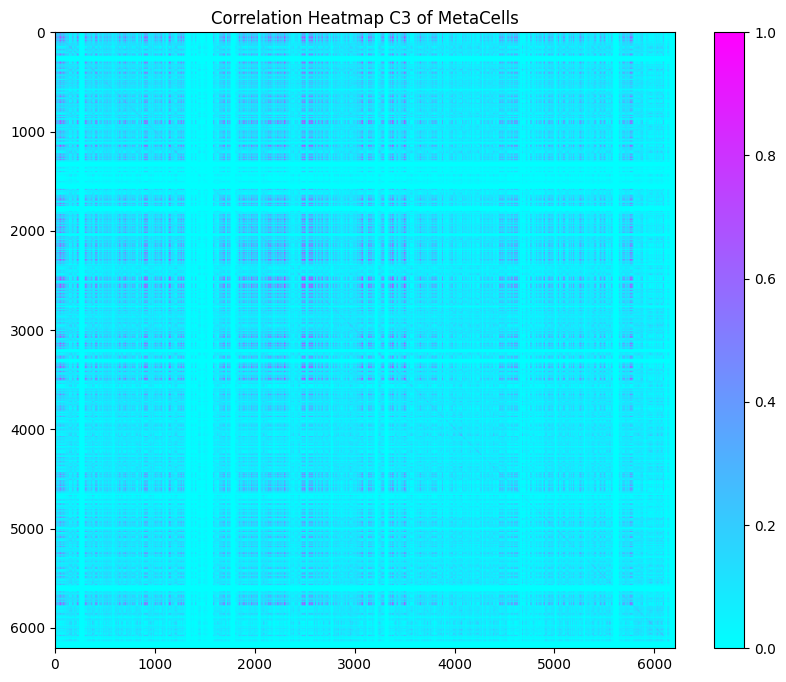

In [14]:
# Plot the correlation matrix for Cell Type C3 to check and ensure the software quality
plt.figure(figsize=(10, 8))  # Adjust size as needed
plt.imshow(corr_matrix_filled_C3, cmap=plt.cm.cool, aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap C3 of MetaCells')
plt.show()

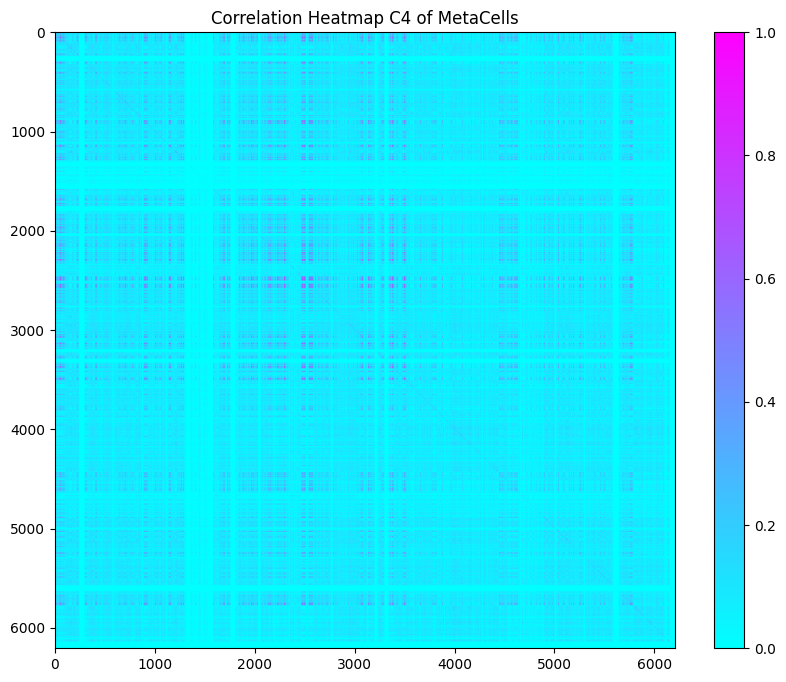

In [15]:
# Plot the correlation matrix for Cell Type C4 to check and ensure the software quality
plt.figure(figsize=(10, 8))  # Adjust size as needed
plt.imshow(corr_matrix_filled_C4, cmap=plt.cm.cool, aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap C4 of MetaCells')
plt.show()

## Generate weighted edgelist

In [16]:
import networkx as nx
import numpy as np

# Generate weighted edgelist for Cell Type C3
# Ensure the correlation matrix is in the right format
print("corr shape: ", corr_matrix_filled_C3.shape)

# Convert the DataFrame to a NumPy array
A_C3 = np.array(corr_matrix_filled_C3)

# Create a graph from the NumPy array
G_C3 = nx.from_numpy_array(A_C3)

# Check the nodes and edges numbers in Graph to ensure software quality for Cell Type C3
print("Graph information:")
print("Number of nodes:", G_C3.number_of_nodes())
print("Number of edges:", G_C3.number_of_edges())

corr shape:  (6206, 6206)
Graph information:
Number of nodes: 6206
Number of edges: 5031099


In [17]:
# Generate weighted edgelist for Cell Type C4
# Ensure the correlation matrix is in the right format
print("corr shape: ", corr_matrix_filled_C4.shape)

# Convert the DataFrame to a NumPy array
A_C4 = np.array(corr_matrix_filled_C4)

# Create a graph from the NumPy array
G_C4 = nx.from_numpy_array(A_C4)

# Check the nodes and edges numbers in Graph to ensure software quality for Cell Type C3
print("Graph information:")
print("Number of nodes:", G_C4.number_of_nodes())
print("Number of edges:", G_C4.number_of_edges())

corr shape:  (6206, 6206)
Graph information:
Number of nodes: 6206
Number of edges: 5216481


In [18]:
# Save the weighted edgelist for next step input.
nx.write_weighted_edgelist(G_C3, "./embedding/weighted_C3.edgelist")
nx.write_weighted_edgelist(G_C4, "./embedding/weighted_C4.edgelist")


## Generate bcsr file

In [27]:
# Generate bscr file for Cell Type C3. The bscr file is the input for graph embedding.
# https://github.com/aicb-ZhangLabs/scENCORE/blob/main/tool/generate_bcsr.py
# The above code was downloaded to local folder.
# The none correlated nodes are removed therefore the nodes number changed from 6206 to 4630
# Output the nodes and edges number for software quality check.
!python3 generate_bcsr.py --format weighted_edgelist --undirected --sep " " ./embedding/weighted_C3.edgelist ./tmp/tmp.bcsr

2024-08-04 10:11:03,632 INFO convert graph from ./embedding/weighted_C3.edgelist to ./tmp/tmp.bcsr
2024-08-04 10:11:05,888 INFO Node IDs are numbers: True
2024-08-04 10:11:15,430 INFO num vertices=4630; num edges=10057568;
2024-08-04 10:11:16,528 INFO done.


## Graph Embedding

In [28]:
# Use the verse executable file to conduct the graph embedding. The verse executable file is generated by the make of C++ code in the scENCORE project.
# https://github.com/aicb-ZhangLabs/scENCORE/tree/main/verse-master/src
# Output the nodes and edges number for software quality check.
! ./verse \
    -input ./tmp/tmp.bcsr \
    -output ./tmp/tmp.bin \
    -dim 32 \
    -alpha 0.10 \
    -threads 4 \
    -nsamples 3

nv: 4630, ne: 10057568
Total steps (mil): 463

Calculations took 0.00894584 s to run


## Save Graph Embedding

In [29]:
# Generate graph embedding for Cell Type C3.
# https://github.com/aicb-ZhangLabs/scENCORE/blob/main/tool/generate_embeddings.py
# The above code was downloaded to local folder and modified to add the output file argument -o for output file name.
# Save the embedding matrix to "./embedding/corr_0_1_VERSE_C3.npy"
!python3 ./generate_embeddings.py -d ./embedding/ -g corr -es 32 -alpha 0.10 -nsamples 3 -o C3

Loading embeddings...
Done loading embeddings (shape: (4630, 32)).


In [23]:
# Cell Type C4 Graph embedding starting from here

In [30]:
# https://github.com/aicb-ZhangLabs/scENCORE/blob/main/tool/generate_bcsr.py
# The above code was downloaded to local folder.
# The none correlated nodes are removed therefore the nodes number changed from 6206 to 4630
# Output the nodes and edges number for software quality check.
!python3 generate_bcsr.py --format weighted_edgelist --undirected --sep " " ./embedding/weighted_C4.edgelist ./tmp/tmp.bcsr

2024-08-04 10:11:24,141 INFO convert graph from ./embedding/weighted_C4.edgelist to ./tmp/tmp.bcsr
2024-08-04 10:11:26,461 INFO Node IDs are numbers: True
2024-08-04 10:11:36,940 INFO num vertices=4630; num edges=10428332;
2024-08-04 10:11:38,100 INFO done.


In [31]:
# Use the verse executable file to conduct the graph embedding. The verse executable file is generated by the make of C++ code in the scENCORE project.
# https://github.com/aicb-ZhangLabs/scENCORE/tree/main/verse-master/src
# Output the nodes and edges number for software quality check.

! ./verse \
    -input ./tmp/tmp.bcsr \
    -output ./tmp/tmp.bin \
    -dim 32 \
    -alpha 0.10 \
    -threads 4 \
    -nsamples 3

nv: 4630, ne: 10428332
Total steps (mil): 463

Calculations took 0.0112768 s to run


In [32]:
# https://github.com/aicb-ZhangLabs/scENCORE/blob/main/tool/generate_embeddings.py
# The above code was downloaded to local folder and modified.
# Save the embedding matrix to "./embedding/corr_0_1_VERSE_32_alpha01_ns3_C3.npy"
!python3 ./generate_embeddings.py -d ./embedding/ -g corr -es 32 -alpha 0.10 -nsamples 3 -o C4
# After this command, manually change the file name from "./embedding/corr_0_1_VERSE_32_alpha01_ns3.npy" to "./embedding/corr_0_1_VERSE_32_alpha01_ns3_C4.npy"

Loading embeddings...
Done loading embeddings (shape: (4630, 32)).


## Unsupervised clustering

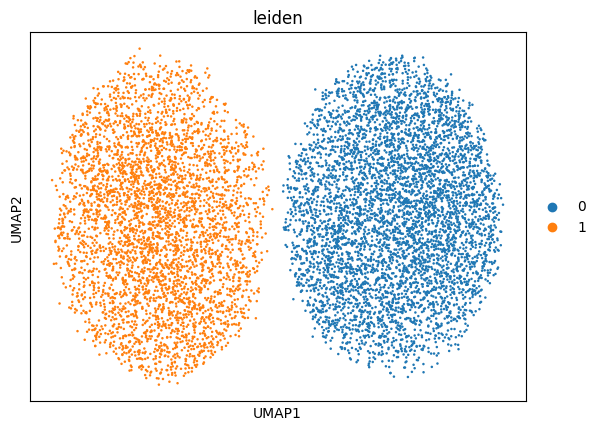

In [34]:
import anndata as ad
import numpy as np
import scanpy as sc
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.linalg import orthogonal_procrustes


# The parameters for embedding_size and meta_number were thoroughly investigated in the related publication.
# The values used in this project reflect the optimized settings determined by that research. This ensure the software quality.
embedding_size=128
meta_number=130
embedding_C3 = np.load("./embedding/corr_0_1_VERSE_C3.npy")
embedding_C4 = np.load("./embedding/corr_0_1_VERSE_C4.npy")

# Graph alignment
R, _ = orthogonal_procrustes(embedding_C3, embedding_C4)
transfer_C3 = embedding_C3 @ R

# Clustering
embedding = np.vstack((transfer_C3, embedding_C4))
adata = ad.AnnData(embedding)
sc.pp.neighbors(adata, n_neighbors=50, use_rep='X')
sc.tl.leiden(adata,resolution=0.63)
sc.tl.umap(adata)

# Get UMAP coordinates
umap_coords = adata.obsm['X_umap']

# Adjust cluster positions
cluster_1_indices = adata.obs['leiden'] == '1'
cluster_0_indices = adata.obs['leiden'] == '0'
umap_coords[cluster_1_indices, 0] -= 3.5
umap_coords[cluster_0_indices, 0] += 3.5

# Plot adjusted UMAP
fig, ax = plt.subplots()
sc.pl.umap(adata, color='leiden', ax=ax, show=False)
plt.show()

# Detect A/B Compartment Switch

Key point found at index: 2004


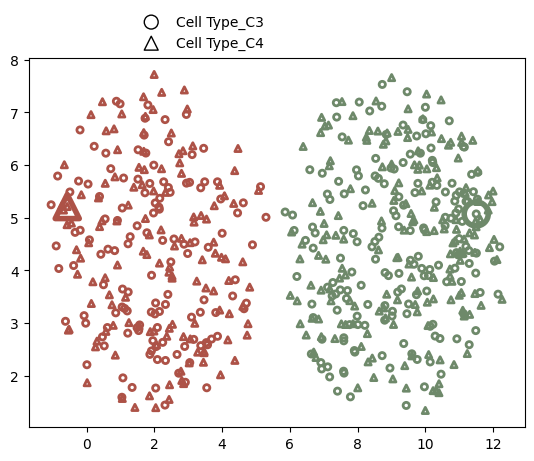

In [35]:
# This part is to detect A/B Compartment Switch
# Find key_point within the specified range
start, end = 2000, 2300
key_point = None
offset = 4630
for i in range(start, end + 1):
    if cluster_0_indices.iloc[i] and cluster_1_indices.iloc[i + offset]:
        key_point = i
        break

if key_point is not None:
    print(f"Key point found at index: {key_point}")
else:
    print("No key point found within the specified range.")

# Plot adjusted UMAP without background
fig, ax = plt.subplots()
pos = np.array(adata.obsm['X_umap'])
color_array = np.array(adata.obs["leiden"], dtype=np.int32)
color_list = []
size_list = []
linewidths_list = []
for i in range(color_array.shape[0]):
    if (i >= start and i <= end) or (i >= start + offset and i <= end + offset):
        size_list.append(30)
        linewidths_list.append(2)
        if color_array[i] == 1:
            color_list.append("#ad5247")
        else:
            color_list.append("#6e896a")
    else:
        size_list.append(5)
        linewidths_list.append(1)
        color_list.append("#C0C0C0")

edgecolors_list = color_list
non_color_list = ['none' for _ in range(color_array.shape[0])]
thicker_linewidth = 4  # Adjusted for clarity

for i in range(color_array.shape[0]):
    if i < offset:
        if (i >= start and i <= end):
            plt.scatter(pos[i, 0], pos[i, 1], s=20, color=non_color_list[i], marker="o",
                        edgecolors=edgecolors_list[i], linewidths=linewidths_list[i])
            if key_point is not None and i == key_point:
                plt.scatter(pos[i, 0], pos[i, 1], s=300, color='none', marker="o",
                            edgecolors=edgecolors_list[i], linewidths=thicker_linewidth)
    else:
        if (i >= start + offset and i <= end + offset):
            plt.scatter(pos[i, 0], pos[i, 1], s=20, color=non_color_list[i], marker="^",
                        edgecolors=edgecolors_list[i], linewidths=linewidths_list[i])
            if key_point is not None and i == key_point + offset:
                plt.scatter(pos[i, 0], pos[i, 1], s=300, color='none', marker="^",
                            edgecolors=edgecolors_list[i], linewidths=thicker_linewidth)

# Add legend for markers
plt.scatter([], [], color='none', marker='o', s=100, edgecolor='black', label='Cell Type_C3')
plt.scatter([], [], color='none', marker='^', s=100, edgecolor='black', label='Cell Type_C4')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), ncol=1, frameon=False)

# Save and show plot
plt.show()


# The End of Main Code